In [1]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload a file

Saving customer_shopping_data.csv to customer_shopping_data.csv


In [2]:
import sqlite3  # For database operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For data visualization

# Enable inline plots in Colab
%matplotlib inline

 # Load sales data from CSV
df = pd.read_csv("/content/customer_shopping_data.csv")

# Add a Revenue column
df["Revenue"] = df["quantity"] * df["price"]

# Display DataFrame
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Revenue
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


In [3]:
# Connect to SQLite (creates a database file)
conn = sqlite3.connect("sales.db")
cursor = conn.cursor()

# Create a sales table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Coustomer_Sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        date TEXT,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

# Insert sales data into the table
df.to_sql("Coustomer_Sales", conn, if_exists="replace", index=False)

# Commit and close connection
conn.commit()

In [4]:
# Query total sales per category
query = "SELECT category, SUM(quantity * price) AS total_sales FROM Coustomer_Sales GROUP BY category"
df_sales = pd.read_sql(query, conn)

# Display result
df_sales

,category,total_sales
0,Books,8.345529e+05
1,Clothing,1.139968e+08
2,Cosmetics,6.792863e+06
3,Food & Beverage,8.495351e+05
4,Shoes,6.655345e+07
5,Souvenir,6.358246e+05
6,Technology,5.786235e+07
7,Toys,3.980426e+06


In [5]:
# Connect to the database (if not already connected)
import sqlite3
conn = sqlite3.connect("sales.db")
cursor = conn.cursor()

# Execute your SQL queries

# Query total quantity number of sales per category
query1 = "SELECT category, SUM(quantity) AS total_quantity FROM Coustomer_Sales GROUP BY category"
df_sales = pd.read_sql(query1, conn)
print(df_sales)  # Print the results

# Query total sales per payment_method
query2 = "SELECT payment_method, SUM(quantity * price) AS payment_method_sales FROM Coustomer_Sales GROUP BY payment_method"
payment_method = pd.read_sql(query2, conn)
print(payment_method)  # Print the results

# Query total sales per shoppin_mall
query3 = "SELECT shopping_mall, SUM(quantity * price) AS shoppin_mall_sales FROM Coustomer_Sales GROUP BY shopping_mall"
shoppin_mall = pd.read_sql(query3, conn)
print(shoppin_mall)  # Print the results

# Query total sales per invoice_date
query4 = "SELECT invoice_date, SUM(quantity * price) AS daily_revenue FROM Coustomer_Sales GROUP BY invoice_date ORDER BY invoice_date ASC"
invoice_date = pd.read_sql(query4, conn)
print(invoice_date)  # Print the results

# Query total quantity number cosmetics category per gender
query5 = "SELECT category,gender, SUM(quantity * price) AS total_cosmetics_quantity FROM Coustomer_Sales WHERE category ='Cosmetics' GROUP BY gender"
cosmetics_gender = pd.read_sql(query5, conn)
print(cosmetics_gender)  # Print the results


# Query highest number of toys sales per shopping_mall
query6 = "SELECT category,shopping_mall, AVG(quantity * price) AS Highest_toys_sales FROM Coustomer_Sales WHERE category ='Toys' GROUP BY shopping_mall ORDER BY shopping_mall DESC LIMIT 2 "
toys_sales = pd.read_sql(query6, conn)
print(toys_sales)  # Print the results

# Close the connection (optional if you're done with the database)
conn.close()

with open("queries.sql", "w") as file: # Removed extra indentation
    file.write(query1 + "\n")
    file.write(query2 + "\n")
    file.write(query3 + "\n")
    file.write(query4 + "\n")
    file.write(query5 + "\n")
    file.write(query6 + "\n")

files.download("queries.sql") # Removed extra indentation



          category  total_quantity
0            Books           14982
1         Clothing          103558
2        Cosmetics           45465
3  Food & Beverage           44277
4            Shoes           30217
5         Souvenir           14871
6       Technology           15021
7             Toys           30321
  payment_method  payment_method_sales
0           Cash          1.128322e+08
1    Credit Card          8.807712e+07
2     Debit Card          5.059643e+07
       shopping_mall  shoppin_mall_sales
0        Cevahir AVM        1.264514e+07
1  Emaar Square Mall        1.240610e+07
2     Forum Istanbul        1.230392e+07
3       Istinye Park        2.461883e+07
4             Kanyon        5.055423e+07
5   Mall of Istanbul        5.087248e+07
6          Metrocity        3.730279e+07
7       Metropol AVM        2.537991e+07
8     Viaport Outlet        1.252134e+07
9       Zorlu Center        1.290105e+07
    invoice_date  daily_revenue
0       1/1/2021      271192.66
1       1/1/20

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

year
2021    45.549873
2022    45.898272
2023     8.551854
Name: daily_revenue, dtype: float64


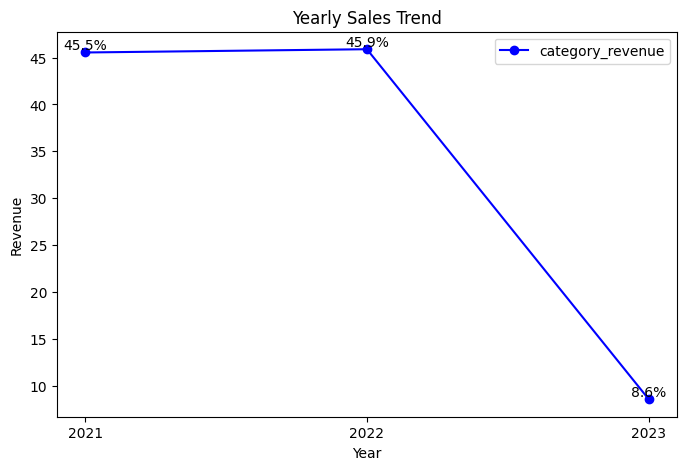

In [110]:
import sqlite3
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For data visualization

# Re-establish connection to the database
conn = sqlite3.connect("sales.db")  # Reconnect to the database

# Fetch data with invoice_date and daily_revenue
query = "SELECT invoice_date, SUM(quantity * price) AS daily_revenue FROM Coustomer_Sales GROUP BY invoice_date ORDER BY invoice_date ASC"
df_sales = pd.read_sql(query, conn)

# Extract year from invoice_date
# Specify the correct date format (day/month/year)
df_sales['year'] = pd.to_datetime(df_sales['invoice_date'], format='%d/%m/%Y').dt.year

# Group by year sum of revenue
grouped_df = df_sales.groupby('year')['daily_revenue'].sum() # Changed df to df_sales and Revenue to daily_revenue
yearly_sales_percentage = grouped_df / grouped_df.sum() * 100
print(yearly_sales_percentage)

# Plot sales trend
plt.figure(figsize=(8, 5))

# Plot the data as line
plt.plot(yearly_sales_percentage.index, yearly_sales_percentage.values, marker='o', linestyle='-', color='blue', label="category_revenue")
for index, value in enumerate(yearly_sales_percentage.values):#index is a position of an item list like 0,1,2,3
    plt.text(yearly_sales_percentage.index[index], value, f"{value:.1f}%" , ha='center', va='bottom',fontsize=10) #f"{value:.1f}%" mention the float value after the point value

# Show the data lable of category values
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.title("Yearly Sales Trend")
plt.xticks(yearly_sales_percentage.index) # Use grouped_df.index for x-axis ticks
plt.legend()
plt.show()

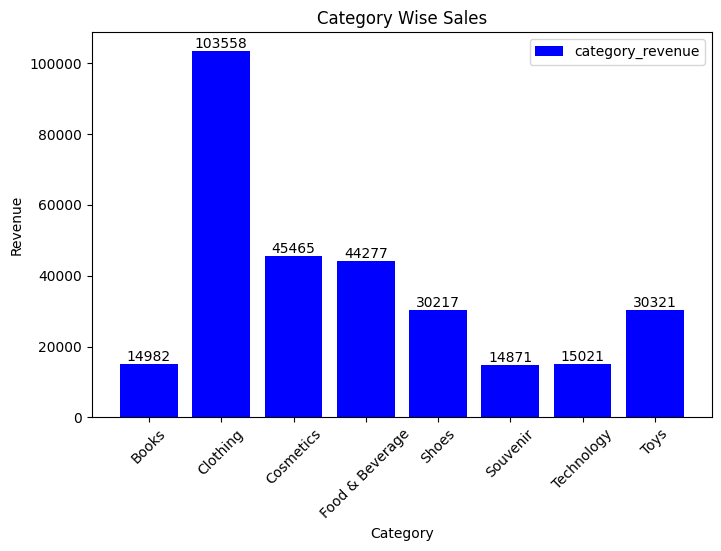

In [112]:
import sqlite3
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For data visualization

# Re-establish connection to the database
conn = sqlite3.connect("sales.db")  # Reconnect to the database

query1 = "SELECT category, SUM(quantity) AS total_quantity FROM Coustomer_Sales GROUP BY category"
df_sales = pd.read_sql(query1, conn)

# Plot sales trend
plt.figure(figsize=(8,5))
plt.bar(df_sales["category"], df_sales["total_quantity"], color='blue', label="category_revenue")

# Show the data lable of category values
for index, value in enumerate(df_sales["total_quantity"]):#index is a position of an item list like 0,1,2,3
    plt.text(index,value, str(value), ha='center', va='bottom' ,fontsize=10)

# Plot the data as line
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.title("Category Wise Sales")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Close the connection when done
conn.close() # Close the connection after using it

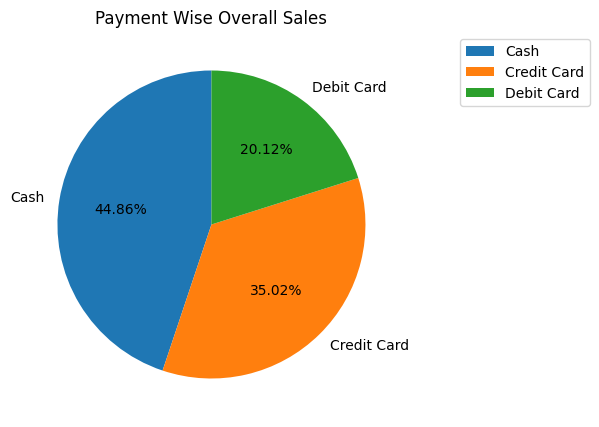

In [108]:
import sqlite3
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For data visualization

# Re-establish connection to the database
conn = sqlite3.connect("sales.db")  # Reconnect to the database

# Query total sales per payment_method
query2 = "SELECT payment_method, SUM(quantity * price) AS payment_method_sales FROM Coustomer_Sales GROUP BY payment_method"
payment_method = pd.read_sql(query2, conn)


# Plot sales trend
plt.figure(figsize=(5,5))
plt.pie(payment_method["payment_method_sales"], labels=payment_method["payment_method"], autopct='%1.2f%%', startangle=90 )#autopct='%1.1f%% display the % value and floating point,#startangle=90 rotate the chart for better visulization
plt.legend(payment_method["payment_method"], loc="upper right", bbox_to_anchor=(1.5, 1))# Adjust the legend data in better position bbox_to_anchor=(1.5, 1)fixed the excat position
plt.title("Payment Wise Overall Sales")
plt.xticks(rotation=45)
plt.show()

# Close the connection when done
conn.close() # Close the connection after using it
